In [1]:
import os
import pandas as pd
import numpy as np
from featurewiz import featurewiz
from matplotlib import pyplot as plt

import json


folder = os.path.join("/", "RanD", "CREMEv2_Result", "20230207", "logs", "label_traffic")

if os.path.exists(folder):
    print("Path is exist!!!")
    filename_label = 'extract_traffic_mirai_nfstream.csv'
    label_technique = 'labels_technique.json'
    label_lifecycle = 'labels_lifecycle.json'
else:
    print("Path is not exist!!!")

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

Path is exist!!!


In [2]:
df = pd.read_csv(os.path.join(folder, "nfstream", filename_label))
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271098 entries, 0 to 271097
Data columns (total 77 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            271098 non-null  int64  
 1   expiration_id                 271098 non-null  int64  
 2   src_ip                        271098 non-null  object 
 3   src_mac                       271098 non-null  object 
 4   src_oui                       271098 non-null  object 
 5   src_port                      271098 non-null  int64  
 6   dst_ip                        271098 non-null  object 
 7   dst_mac                       271098 non-null  object 
 8   dst_oui                       271098 non-null  object 
 9   dst_port                      271098 non-null  int64  
 10  protocol                      271098 non-null  int64  
 11  ip_version                    271098 non-null  int64  
 12  vlan_id                       271098 non-nul

,id,expiration_id,src_port,dst_port,protocol,ip_version,vlan_id,tunnel_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,...,src2dst_rst_packets,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets
count,271098.000000,271098.000000,271098.000000,271098.000000,271098.000000,271098.000000,271098.0,271098.000000,2.710980e+05,2.710980e+05,...,271098.000000,271098.000000,271098.000000,271098.0,271098.000000,271098.0,271098.000000,271098.000000,271098.000000,271098.000000
mean,135548.500000,0.001346,42695.872769,10992.004128,9.995743,4.000465,0.0,0.000033,1.675415e+12,1.675415e+12,...,0.622247,0.232864,1.044368,0.0,0.000007,0.0,5.131366,1.116368,1.595239,0.491811
std,78259.395976,0.036668,14014.499458,18787.932941,5.334385,0.030485,0.0,0.009980,7.247125e+05,7.281825e+05,...,1.935090,0.441114,2.637810,0.0,0.003841,0.0,393.235883,3.803764,4.224901,1.144422
min,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.0,0.000000,1.675414e+12,1.675414e+12,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,67774.250000,0.000000,39030.000000,53.000000,6.000000,4.000000,0.0,0.000000,1.675415e+12,1.675415e+12,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,135548.500000,0.000000,45803.000000,80.000000,6.000000,4.000000,0.0,0.000000,1.675415e+12,1.675415e+12,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.000000,0.000000,1.000000,0.000000
75%,203322.750000,0.000000,50407.000000,12782.750000,17.000000,4.000000,0.0,0.000000,1.675415e+12,1.675415e+12,...,0.000000,0.000000,1.000000,0.0,0.000000,0.0,5.000000,1.000000,2.000000,1.000000
max,271097.000000,1.000000,65531.000000,65535.000000,58.000000,6.000000,0.0,3.000000,1.675417e+12,1.675417e+12,...,368.000000,4.000000,596.000000,0.0,2.000000,0.0,176607.000000,874.000000,575.000000,13.000000


In [4]:
print(df['Label'].unique())
print(len(df['Label']))
print(len(df[df['Label'] == 0]))

[ 0  1  9 11 13  2  4  6  8 10]
2359671
1458551


In [4]:
df.head()


,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,src2dst_rst_packets,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets
0,0,0,192.168.56.121,08:00:27:a7:b4:dc,08:00:27,22,192.168.56.111,08:00:27:38:86:87,08:00:27,44856,...,0,1,0,0,0,0,3,1,0,1
1,1,0,127.0.0.1,08:00:27:7a:4a:64,08:00:27,41177,127.0.0.1,08:00:27:a7:b4:dc,08:00:27,53,...,0,0,0,0,0,0,0,0,0,0
2,2,0,127.0.0.1,08:00:27:ea:bc:6e,08:00:27,49112,127.0.0.1,08:00:27:a7:b4:dc,08:00:27,53,...,0,0,0,0,0,0,0,0,0,0
3,3,0,192.168.56.171,08:00:27:ea:bc:6e,08:00:27,20,192.168.56.141,08:00:27:a7:b4:dc,08:00:27,43529,...,0,1,2,0,0,0,4,0,1,1
4,4,0,192.168.56.151,08:00:27:f0:5e:a1,08:00:27,52582,192.168.56.181,08:00:27:a7:b4:dc,08:00:27,587,...,0,1,1,0,0,0,8,5,1,1


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Caution: We will try to reduce the memory usage of dataframe from 1062.17 MB
        memory usage after optimization is: 222.79 MB
        decreased by 79.0%
    Loaded train data. Shape = (2359671, 59)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename

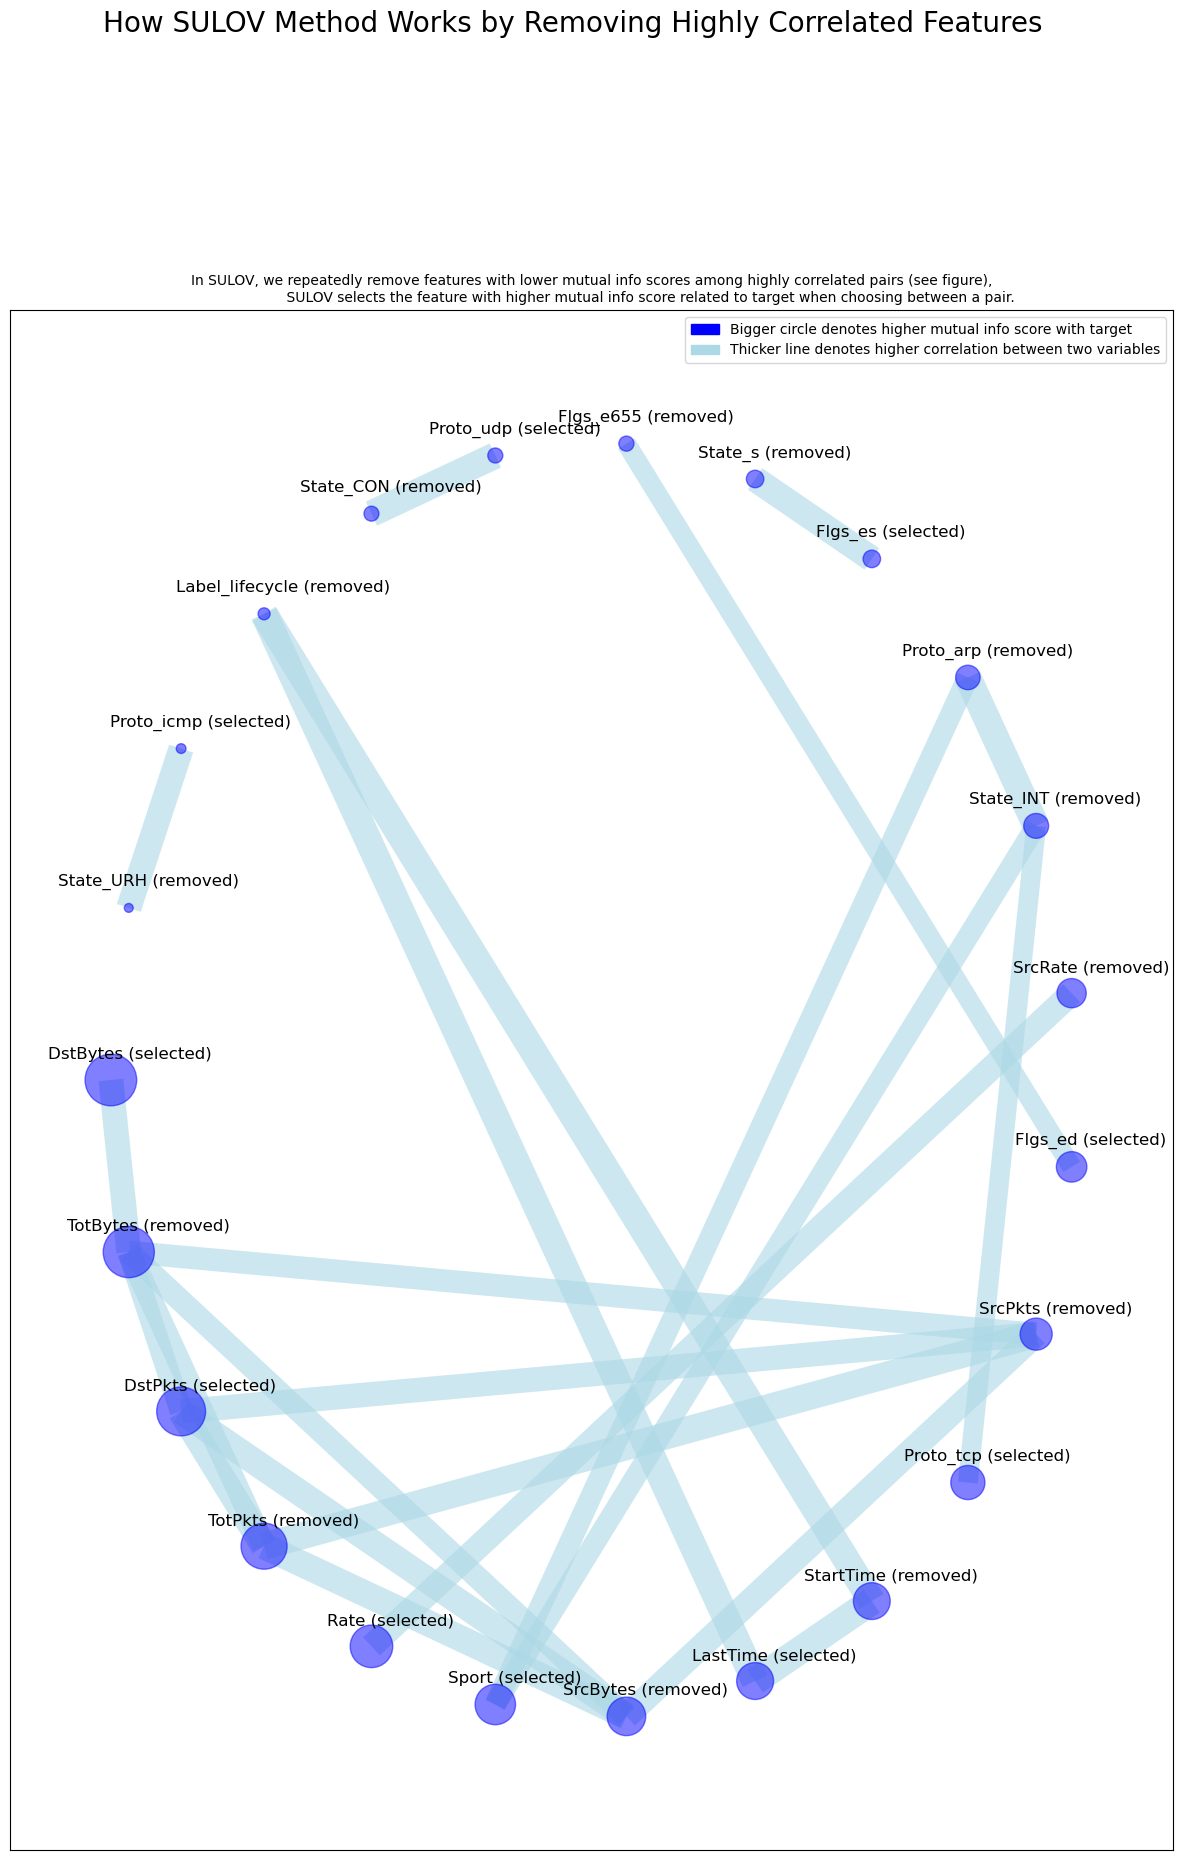

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 38
Finally 38 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 38 
    Taking top 7 features per iteration...
    XGBoost version using 1.7.1 as tree method: hist
Number of booster rounds = 20
        using 38 variables...
Regular XGBoost is crashing due to: [15:40:39] /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/objective/multiclass_obj.cu:123: SoftmaxMultiClassObj: label must be in [0, num_class).
Stack trace:
  [bt] (0) /opt/anaconda3/lib/libxgboost.so(+0xc068f) 

In [7]:
features = featurewiz(df, target='Label', corr_limit=0.70, verbose=2)